In [1]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Train: {}'.format(num_train_examples))
print('Test: {}'.format(num_test_examples))

Train: 60000
Test: 10000


In [4]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
print(dataset)

{'train': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'test': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


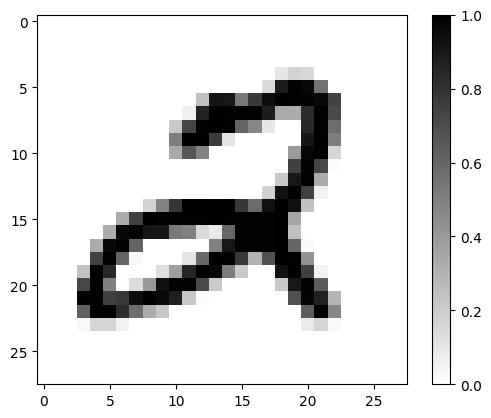

In [5]:
for image, label in test_dataset.take(1):
    break;
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
class_names = ["0",'1', "2", "3", "4",
              "5", "6", "7", "8", "9"]

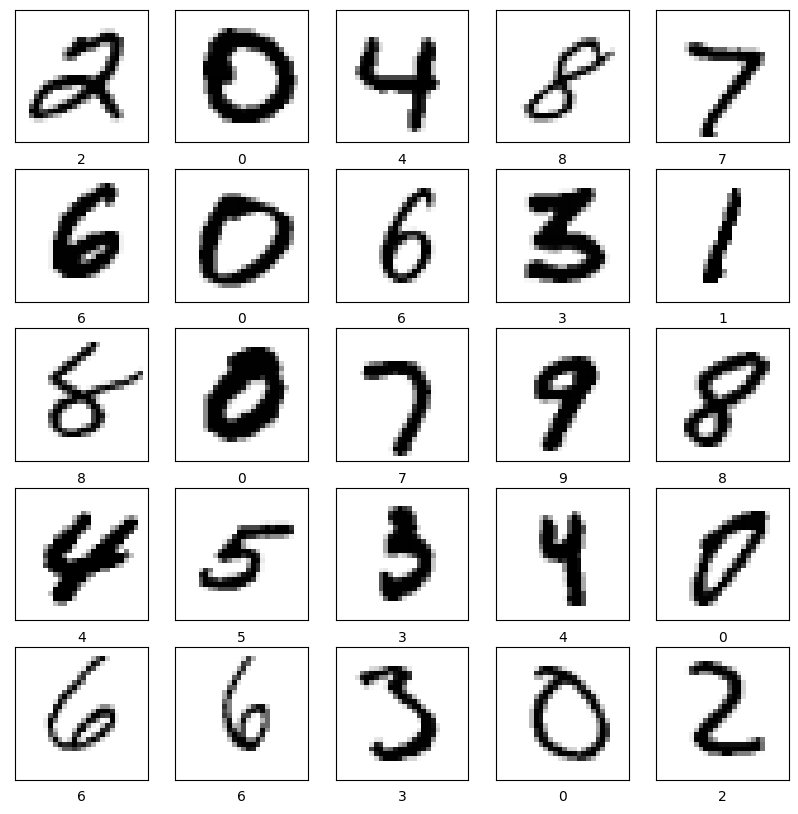

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2495 - accuracy: 0.9297
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0769 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9866


In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0787 - accuracy: 0.9773
Test accuracy:  0.9772999882698059


In [13]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

predictions.shape

1/1 [==============================] - 0s 94ms/step


(32, 10)

In [14]:
predictions[0]

array([1.9973589e-10, 1.7227024e-09, 9.9999356e-01, 5.4721099e-06,
       9.3885376e-08, 1.3549761e-09, 4.2991974e-08, 2.8589422e-09,
       8.7474956e-07, 2.6275931e-10], dtype=float32)

In [15]:
np.argmax(predictions[0])

2

In [16]:

def plot_value_array(i, predictions_array, true_label):
   
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
def plot_image(i, predictions_array, true_labels, images):
    
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
   
    plt.imshow(img[...,0], cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
       

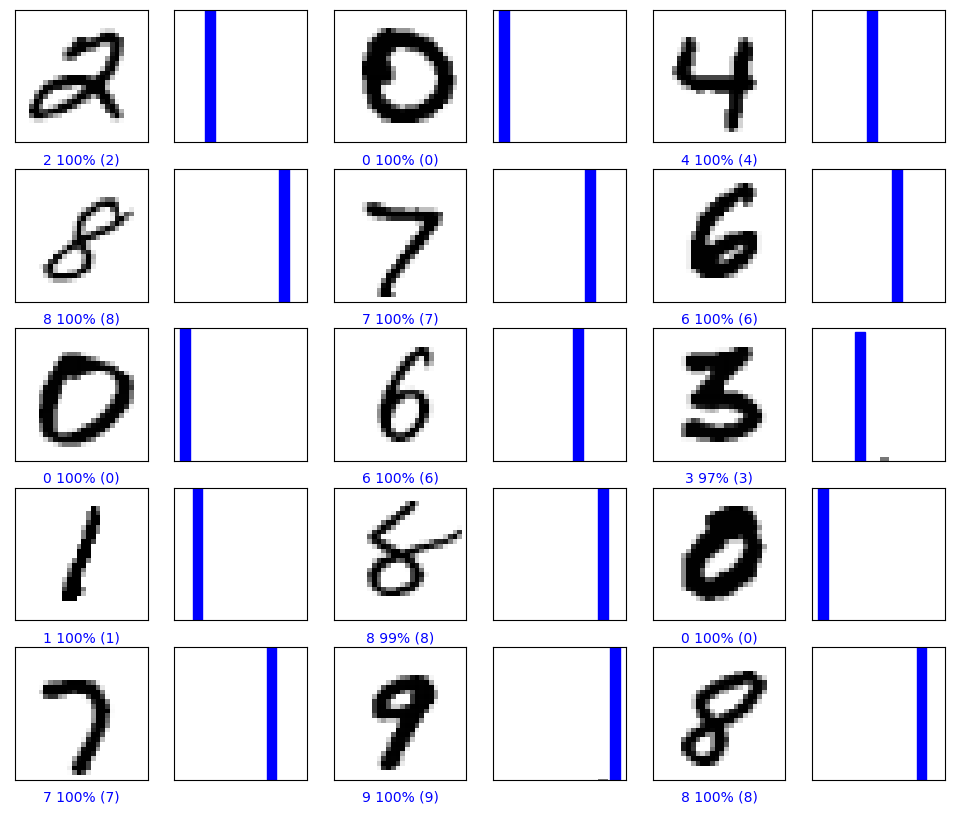

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)